<a href="https://colab.research.google.com/github/Muhammad-Rifky/pcvk-ganjil-2024/blob/main/week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


 Gamma Correction pada Citra 
-----------------------------
Masukkan nilai Gamma: 3


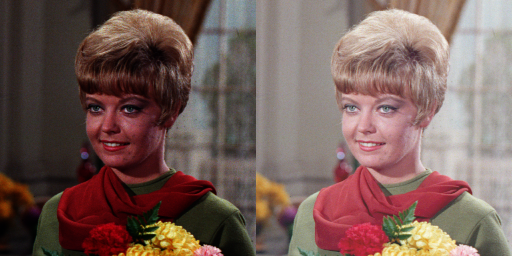

In [5]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

def gamma_correction(img,gamma):
  normalized = img / 255.0
  corrected = np.power(normalized,1.0/gamma)
  return np.uint8(corrected * 255)
print(' Gamma Correction pada Citra ')
print('-----------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')


original = cv.imread('/content/drive/MyDrive/PCVK_MR/Images/female.tiff')

# original = cv.cvtColor(original, cv.COLOR_BGR2RGB)
gamma_image = gamma_correction(original,gamma)

final_frame = cv.hconcat((original,gamma_image))
cv2_imshow(final_frame)


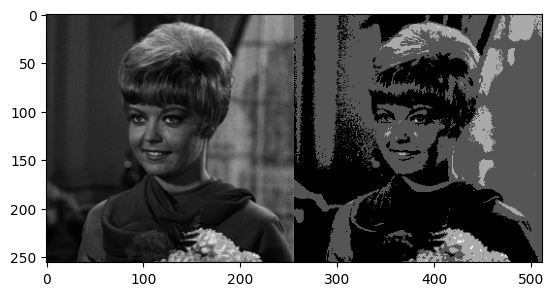

In [15]:
import matplotlib.pyplot as plt

# Parameter untuk bit depth
bit_depth = 2
level = 255 / (pow(2, bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/PCVK_MR/Images/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_image[y, x] = np.round(original[y, x] / level) * level

final_frame = cv.hconcat([original, depth_image])
plt.imshow(final_frame, cmap='gray')

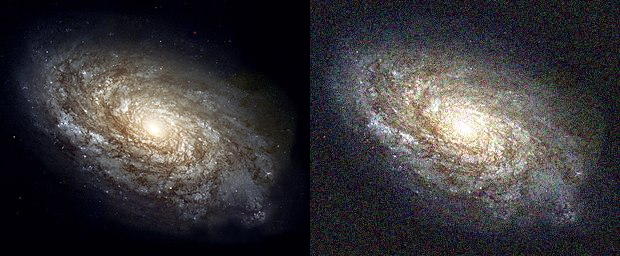

In [17]:
import glob

galaxy = cv.imread('/content/drive/MyDrive/PCVK_MR/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK_MR/Images/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

final_frame = cv.hconcat([galaxy, cv_img[0]])
cv2_imshow(final_frame)

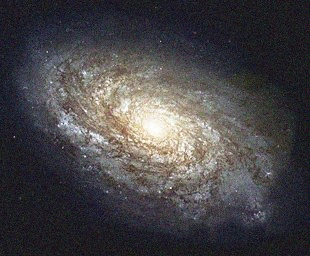

Jumlah Citra:  5
PSNR:  19.41162539834207


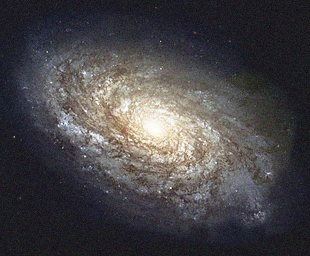

Jumlah Citra:  10
PSNR:  19.5940352713928


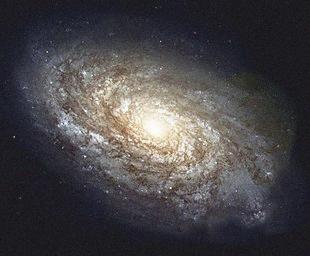

Jumlah Citra:  20
PSNR:  19.686562884548252


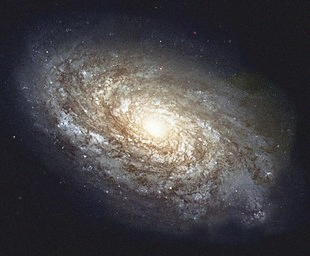

Jumlah Citra:  40
PSNR:  19.730766689246988


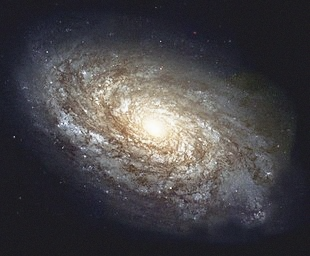

Jumlah Citra:  80
PSNR:  19.752085244395815


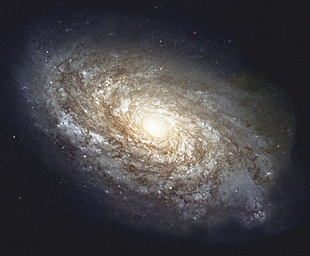

Jumlah Citra:  100
PSNR:  19.758317288501708


In [18]:
from math import sqrt, log10

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if (mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * log10(max_pixel / sqrt(mse))
  return psnr

def image_averaging(list_img, total_img):
  avg_img = np.zeros(list_img[0].shape)
  for i in range(total_img):
    avg_img += list_img[i]

  avg_img /= total_img
  return avg_img

jumlah_citra = np.array([5, 10, 20, 40, 80, 100])

list_denoised_image = []
for i in jumlah_citra:
  denoised_img = image_averaging(cv_img, i)
  list_denoised_image.append(denoised_img)
  cv2_imshow(denoised_img)
  print('Jumlah Citra: ', i)
  print('PSNR: ', PSNR(galaxy, denoised_img))

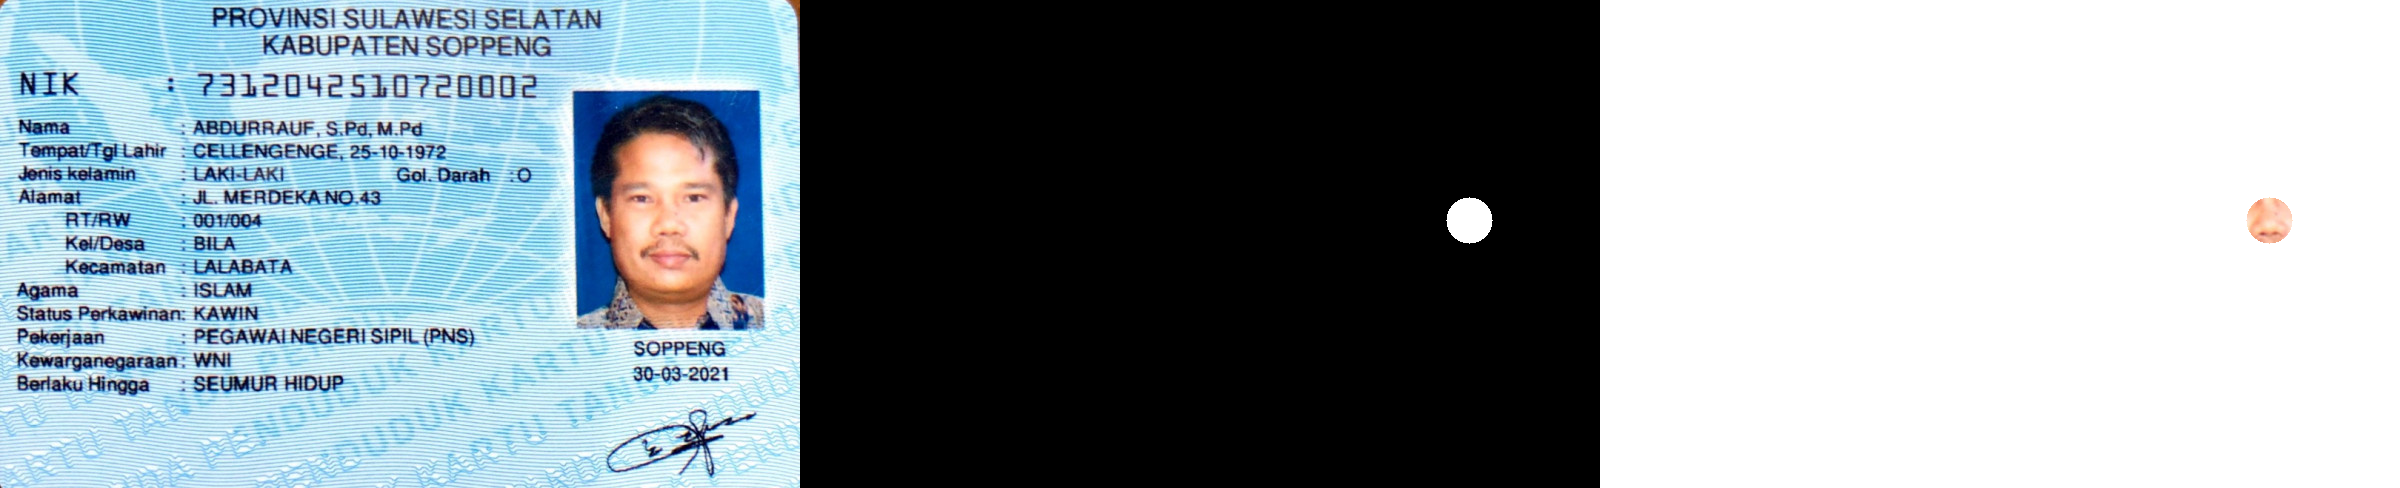

In [35]:
ktp = cv.imread('/content/drive/MyDrive/PCVK_MR/Images/KTP7.jpeg')

circular_mask = np.zeros(ktp.shape[:2], dtype="uint8")

cv.circle(circular_mask, (669, 220), 23, 255, -1)


# Invers mask (white to mask and so do)
inverse_mask = cv.bitwise_not(circular_mask)

# create white background
white_background = np.ones_like(ktp) * 255

# circle mask
ktp_and = cv.bitwise_and(ktp, ktp, mask=circular_mask)

# create white mask
white_part = cv.bitwise_and(white_background, white_background, mask=inverse_mask)

# Gabungkan hasil KTP dengan bagian putih
final_result = cv.add(ktp_and, white_part)

# Tampilkan hasil
frame = cv.hconcat([ktp,cv.cvtColor(circular_mask, cv.COLOR_GRAY2BGR),final_result])
cv2_imshow(frame)

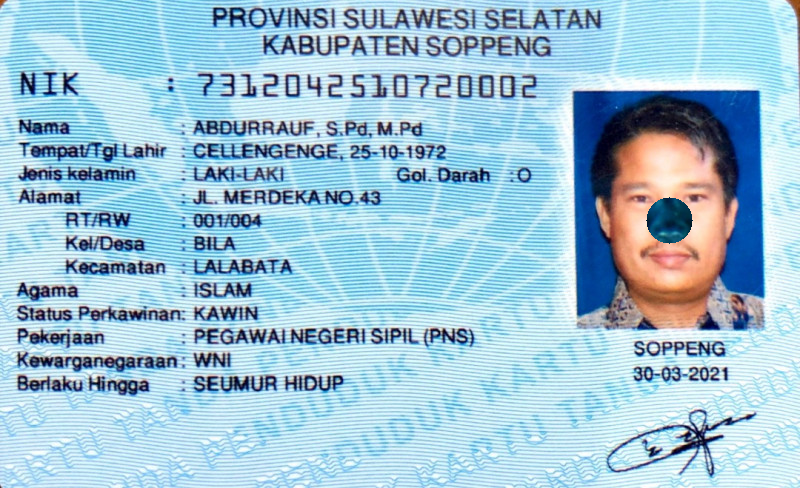

In [32]:
# NOT operator
ktp_not = cv.bitwise_not(image,image.copy(),mask=circle_mask)
cv2_imshow(ktp_not)

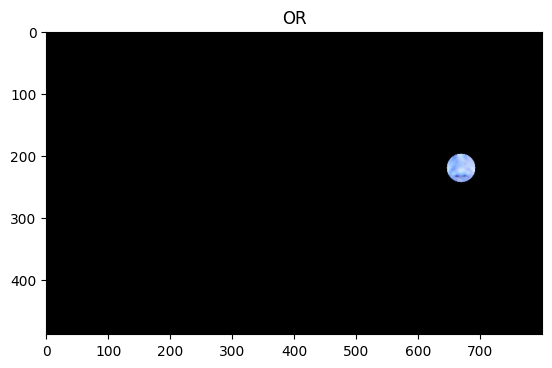

In [36]:
# OR operator

ktp_or = cv.bitwise_or(image,image.copy(),mask=circular_mask)
plt.title('OR')
plt.imshow(ktp_or)

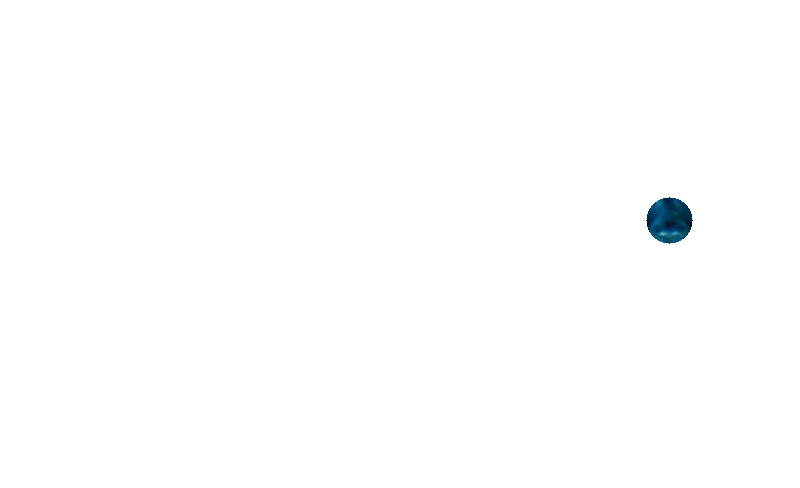

In [37]:
# NAND operator
ktp_nand=cv.bitwise_not(cv.bitwise_and(image,image.copy(),mask=circular_mask))
cv2_imshow(ktp_nand)

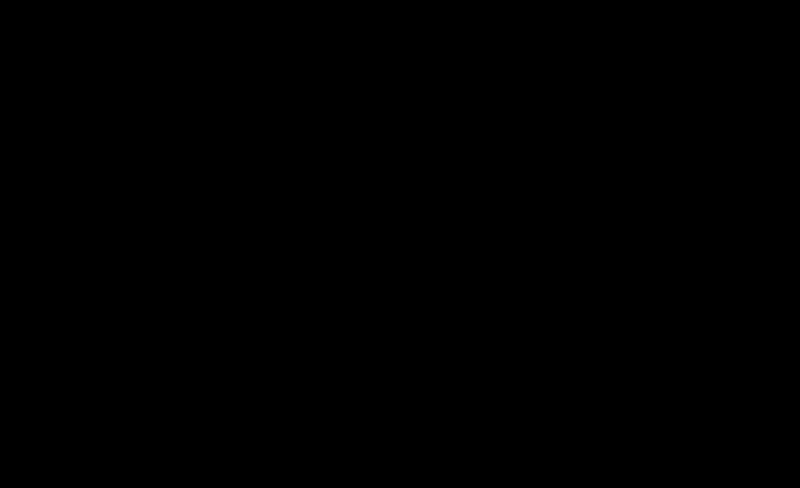

In [38]:
#XOR operator

xor = cv.bitwise_xor(image,image.copy(),mask=circular_mask)
cv2_imshow(xor)